<a href="https://colab.research.google.com/github/satvikGarre/animal-classification/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip animal_classification\ \(1\).zip

Archive:  animal_classification (1).zip
   creating: Animal Classification/
   creating: Animal Classification/dataset/
   creating: Animal Classification/dataset/Bear/
  inflating: Animal Classification/dataset/Bear/bear_1.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_10.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_10_1.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_10_2.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_10_3.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_11.jpeg  
  inflating: Animal Classification/dataset/Bear/Bear_11_1.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_11_2.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_11_3.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_12.jpeg  
  inflating: Animal Classification/dataset/Bear/Bear_12_1.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_12_2.jpg  
  inflating: Animal Classification/dataset/Bear/Bear_12_3.jpg  
  infl

In [ ]:
!ls animal_classification*

'animal_classification (1).zip'


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [ ]:
path = 'Animal Classification'
classes = os.listdir(path)
classes

['Image Classification of animals.pdf', 'dataset']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

zebra_dir = os.path.join('Animal Classification/dataset/Zebra')
tiger_dir = os.path.join('Animal Classification/dataset/Tiger')
bear_dir = os.path.join('Animal Classification/dataset/Bear')
bird_dir = os.path.join('Animal Classification/dataset/Bird')
cat_dir = os.path.join('Animal Classification/dataset/Cat')
cow_dir = os.path.join('Animal Classification/dataset/Cow')
deer_dir = os.path.join('Animal Classification/dataset/Deer')
dog_dir = os.path.join('Animal Classification/dataset/Dog')
dolphin_dir = os.path.join('Animal Classification/dataset/Dolphin')
elephant_dir = os.path.join('Animal Classification/dataset/Elephant')
giraffe_dir = os.path.join('Animal Classification/dataset/Giraffe')
horse_dir = os.path.join('Animal Classification/dataset/Horse')
kangaroo_dir = os.path.join('Animal Classification/dataset/Kangaroo')
lion_dir = os.path.join('Animal Classification/dataset/Lion')
panda_dir = os.path.join('Animal Classification/dataset/Panda')

zebra_names = os.listdir(zebra_dir)
tiger_names = os.listdir(tiger_dir)
bear_names = os.listdir(bear_dir)
bird_names = os.listdir(bird_dir)
cat_names = os.listdir(cat_dir)
cow_names = os.listdir(cow_dir)
deer_names = os.listdir(deer_dir)
dog_names = os.listdir(dog_dir)
dolphin_names = os.listdir(dolphin_dir)
elephant_names = os.listdir(elephant_dir)
giraffe_names = os.listdir(giraffe_dir)
horse_names = os.listdir(horse_dir)
kangaroo_names = os.listdir(kangaroo_dir)
lion_names = os.listdir(lion_dir)
panda_names = os.listdir(panda_dir)

pic_index = 210

zebra_images = [os.path.join(zebra_dir, fname)
              for fname in zebra_names[pic_index-8:pic_index]]
tiger_images = [os.path.join(tiger_dir, fname)
              for fname in tiger_names[pic_index-8:pic_index]]
bear_images = [os.path.join(bear_dir, fname)
              for fname in bear_names[pic_index-8:pic_index]]
bird_images = [os.path.join(bird_dir, fname)
              for fname in bird_names[pic_index-8:pic_index]]
cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
cow_images = [os.path.join(cow_dir, fname)
              for fname in cow_names[pic_index-8:pic_index]]
deer_images = [os.path.join(deer_dir, fname)
              for fname in deer_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]
dolphin_images = [os.path.join(dolphin_dir, fname)
              for fname in dolphin_names[pic_index-8:pic_index]]
elephant_images = [os.path.join(elephant_dir, fname)
              for fname in elephant_names[pic_index-8:pic_index]]
giraffe_images = [os.path.join(giraffe_dir, fname)
              for fname in giraffe_names[pic_index-8:pic_index]]
horse_images = [os.path.join(horse_dir, fname)
              for fname in horse_names[pic_index-8:pic_index]]
kangaroo_images = [os.path.join(kangaroo_dir, fname)
              for fname in kangaroo_names[pic_index-8:pic_index]]
lion_images = [os.path.join(lion_dir, fname)
              for fname in lion_names[pic_index-8:pic_index]]
panda_images = [os.path.join(panda_dir, fname)
              for fname in panda_names[pic_index-8:pic_index]]


for i, img_path in enumerate(zebra_images + tiger_images + bear_images + bird_images+cat_images+cow_images+deer_images+dog_images+dolphin_images+elephant_images+giraffe_images+horse_images+kangaroo_images+lion_images+panda_images ):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

<Figure size 1600x1600 with 0 Axes>

In [ ]:
base_dir = 'Animal Classification'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 1944 files belonging to 1 classes.
Using 1750 files for training.
Found 1944 files belonging to 1 classes.
Using 194 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

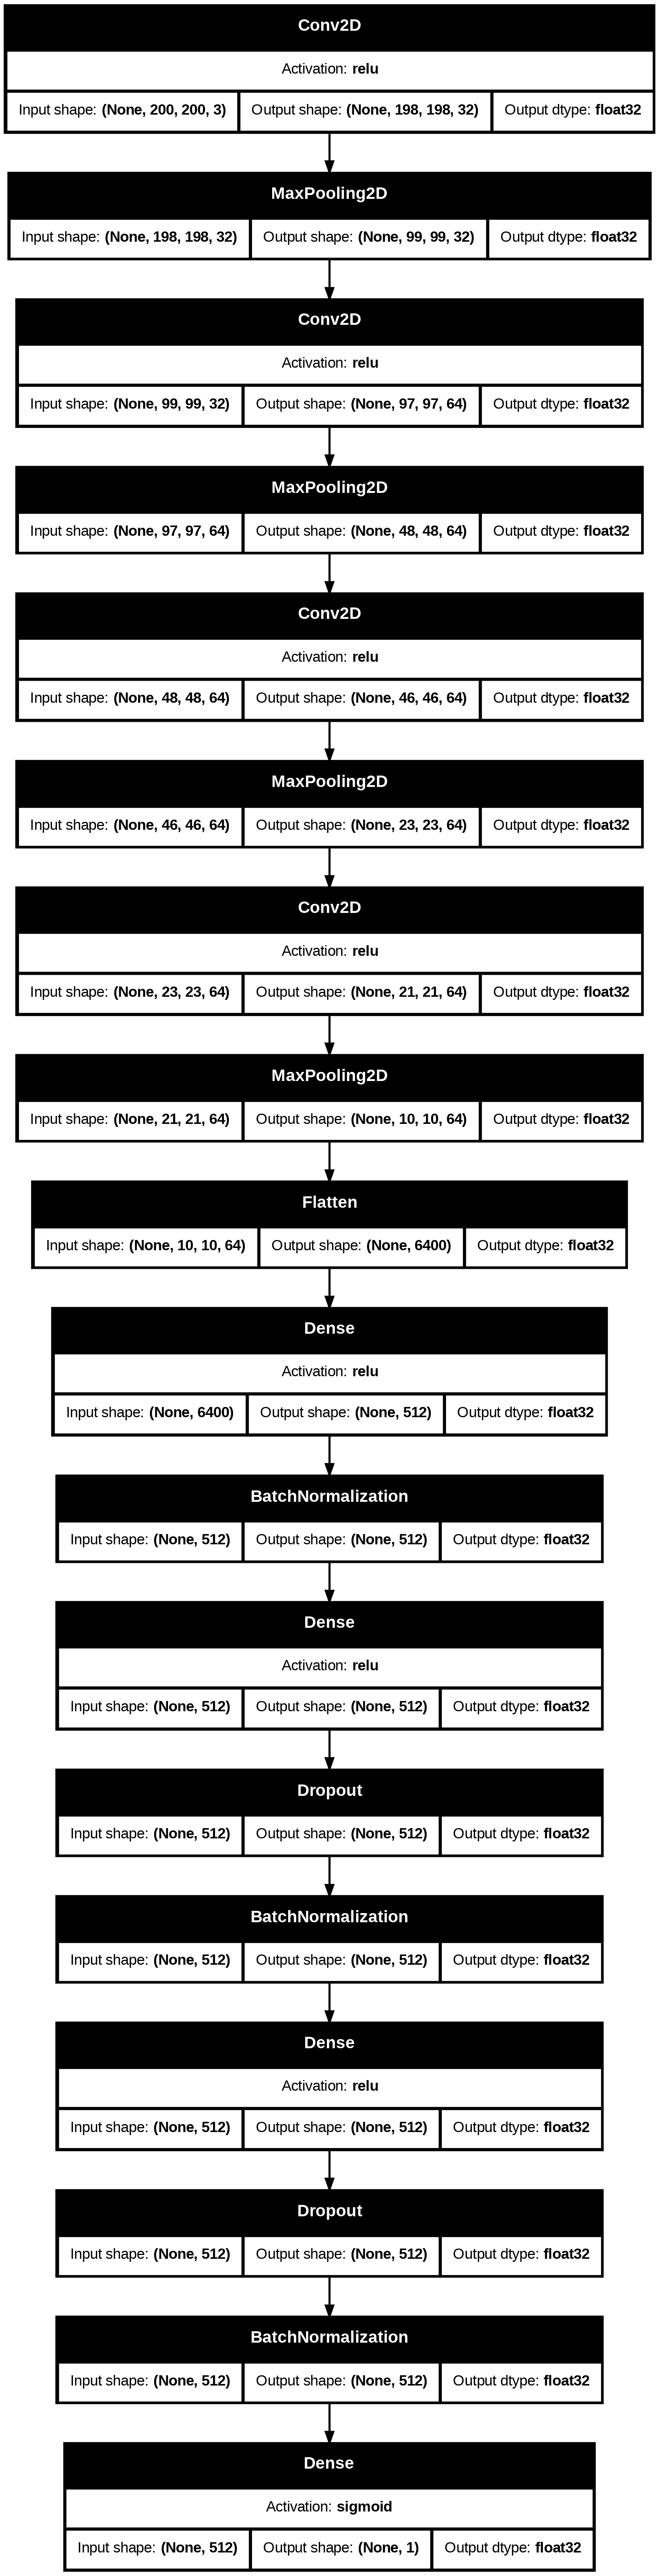

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6328 - loss: 0.7301 - val_accuracy: 1.0000 - val_loss: 0.0921
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9709 - loss: 0.2125 - val_accuracy: 1.0000 - val_loss: 0.0310
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.9993 - loss: 0.0677 - val_accuracy: 1.0000 - val_loss: 0.0190
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 1.0000 - loss: 0.0318 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - v

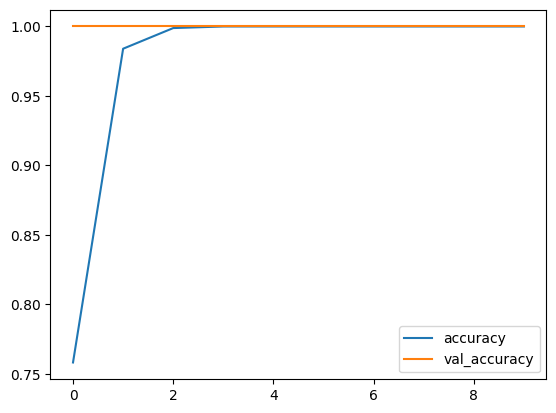

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

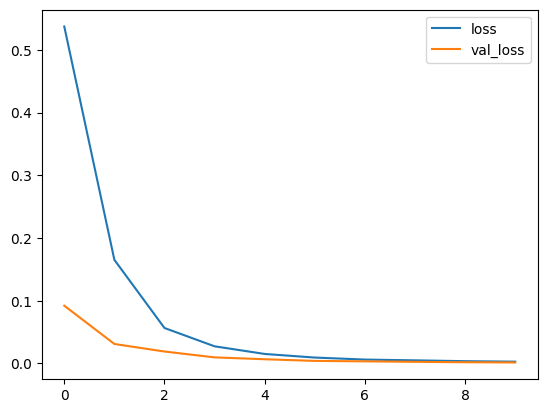

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()


In [ ]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
y_pred = np.round(model.predict(test_datagen))
y_true = np.concatenate([y for x, y in test_datagen], axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 778ms/step
Accuracy: 1.0
F1 Score: 0.0
Confusion Matrix:
[[194]]


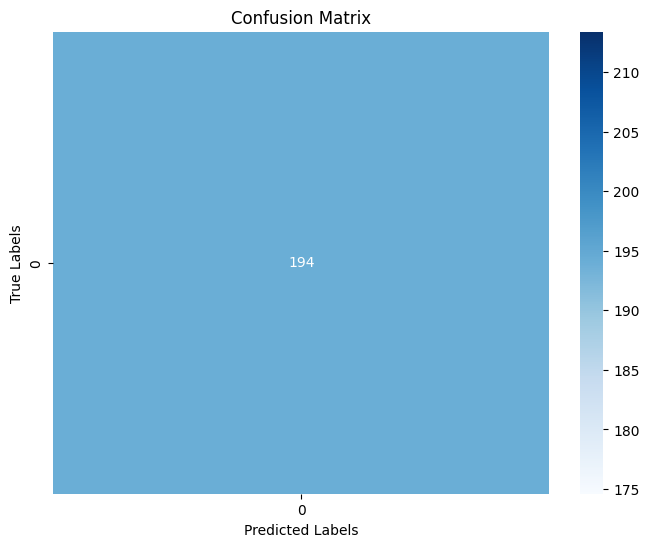

In [ ]:

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()